<a href="https://colab.research.google.com/github/Mark42Zhong/Just-for-fun/blob/main/%E9%A2%91%E5%9F%9F%E6%BB%A4%E6%B3%A2%E5%AE%9E%E9%AA%8C_2018053287%E9%92%9F%E9%B8%BF%E6%96%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

样本图片src_img：


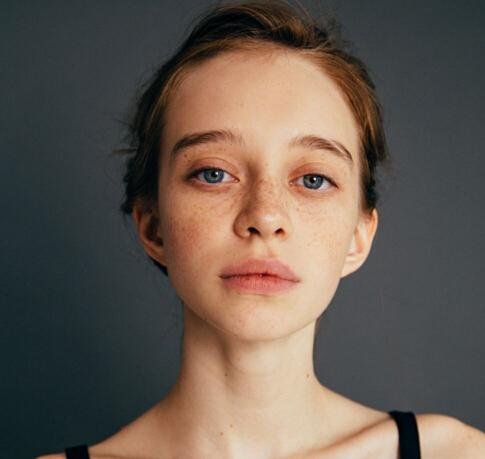

In [4]:
import cv2
import os
import numpy as np
from urllib.request import Request, urlopen
from google.colab.patches import cv2_imshow
%matplotlib inline

"""
  样本文件夹的创建
  and
  样本图片src_img的导入
"""
def mkdir(path):
  isExist = os.path.exists(path)
  if not isExist:
    os.makedirs(path)
    return True
  else:
    return False

def url_to_img(url):
  hdr = {'User-Agent':'Mozilla/5.0'}
  req = Request(url, headers=hdr)
  response = urlopen(req)
  img_array = np.array(bytearray(response.read()), dtype=np.uint8)
  img = cv2.imdecode(img_array, -1)
  return img

if __name__ == "__main__":
  path = "./test_img/"
  url = "https://i1.kknews.cc/SIG=28k4ihu/o0r0001rr2418r2rqn4.jpg"
  mkdir(path)
  src_img = url_to_img(url)
  cv2.imwrite("./test_img/src_img.jpg", src_img)
  print("样本图片src_img：")
  cv2_imshow(src_img)

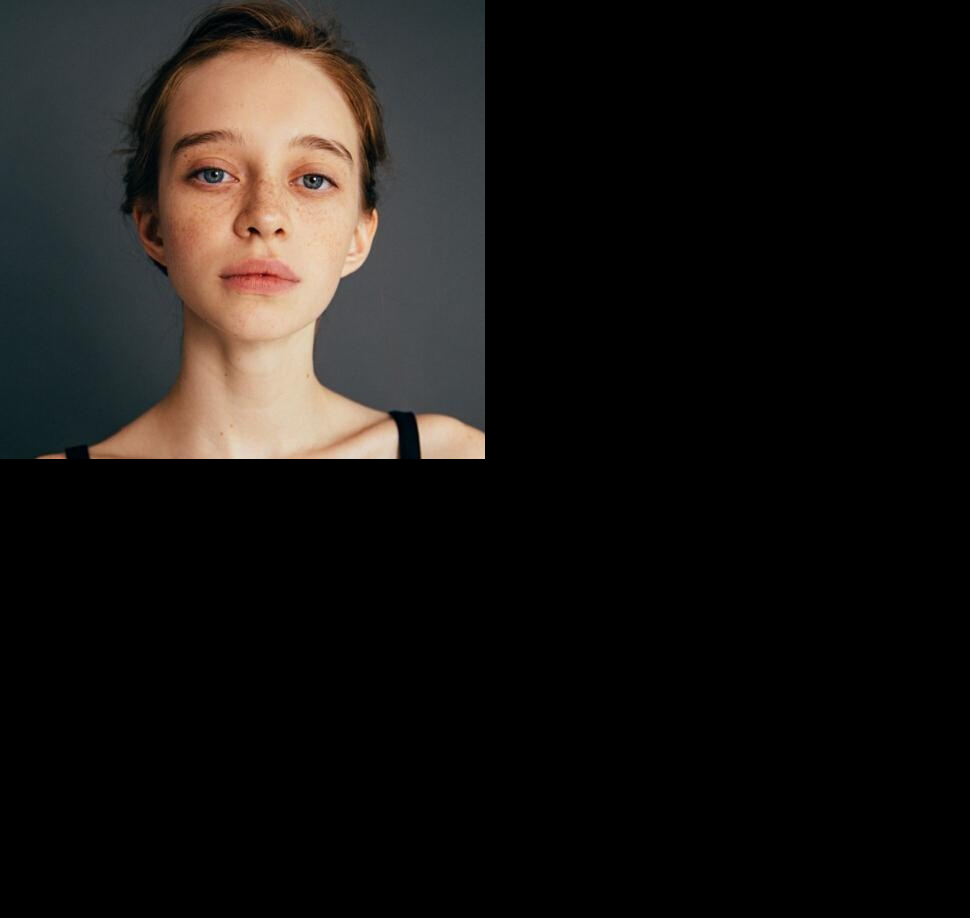

(918, 970, 3)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def fill_zeros(img):
  M, N, channel = img.shape

  filled_img = np.zeros((2*M, 2*N, channel))
  filled_img[0:M, 0:N] = img

  cv2_imshow(filled_img)
  return filled_img

def dft(img):
  M, N, channel = img.shape
  x, y= [], []
  for i in range(M):
    x.extend([i] * N)
  for i in range(M):
    y.extend([i for i in range(N)])

  x = np.reshape(np.array(x), (M, N))
  y = np.reshape(np.array(y), (M, N))

  F = np.zeros((M, N, channel), dtype=np.complex)

  for c in range(channel):
    for u in range(M):
      for v in range(N):
        F[u, v, c] = np.sum(img[..., c] * np.exp(-2j * np.pi * (u * x / M + v * y / N)))
  return F

def shift(F):
  M, N, channel = F.shape

  shifted_F = np.zeros((M, N, channel), dtype=np.complex)

  shifted_F[0:M//2, 0:N//2] = F[M//2:M, N//2:N]
  shifted_F[0:M//2, N//2:N] = F[M//2:M, 0:N//2]
  shifted_F[M//2:M, 0:N//2] = F[0:M//2, N//2:N]
  shifted_F[M//2:M, N//2:N] = F[0:M//2, 0:N//2]

  return shifted_F

def ishift(shifted_F):
  M, N, channel = shifted_F.shape

  F = np.zeros((M, N, channel), dtype=np.complex)

  F[0:M//2, 0:N//2] = shifted_F[M//2:M, N//2:N]
  F[0:M//2, N//2:N] = shifted_F[M//2:M, 0:N//2]
  F[M//2:M, 0:N//2] = shifted_F[0:M//2, N//2:N]
  F[M//2:M, N//2:N] = shifted_F[0:M//2, 0:N//2]

  return F


def idft(F):
  M, N, channel = F.shape
  x, y= [], []
  for i in range(M):
    x.extend([i] * N)
  for i in range(M):
    y.extend([i for i in range(N)])

  x = np.reshape(np.array(x), (M, N))
  y = np.reshape(np.array(y), (M, N))

  img = np.zeros((M, N, channel), dtype=np.complex)

  for c in range(channel):
    for u in range(M):
      for v in range(N):
        img[u, v, c] = np.sum(F[..., c] * np.exp(2j * np.pi * (u * x / M + v * y / N))) / (M * N)

  return img


# 低通滤波器
def low_pass_filter(img):
  r = 100
  rows, cols, channel= img.shape
  crow, ccol = int(rows/2), int(cols/2)
  mask = np.zeros((rows, cols, channel), np.uint8)
  mask[crow-r:crow+r, ccol-r:ccol+r] = 1
  img = img * mask
  return img

def high_pass_filter(img):
  r = 100
  rows, cols, channel= img.shape
  crow, ccol = int(rows/2), int(cols/2)
  mask = np.ones((rows, cols, channel), np.uint8)
  mask[crow-r:crow+r, ccol-r:ccol+r] = 0
  img = img * mask 
  return img

if __name__ == "__main__":
  img = cv2.imread(r'test_img/src_img.jpg')

  filled_img = fill_zeros(img)
  print(filled_img.shape)

  F = dft(img)
  cv2_imshow(F)

  shifted_F = shift(F)
  cv2_imshow(shifted_F)

  shifted_F = low_pass_filter(shifted_F)
  cv2_imshow(shifted_F)

  F = ishift(shifted_F)
  cv2_imshow(F)

  img = idft(F)
  cv2_imshow(img)